# Principal Component Analysis (PCA)

In this notebook, I implement the Principal Component Analysis (PCA) based on the * **Shill Bidding Dataset** *.

I implement the algorithm with the notes defined in * **Lecture 10.2 Principal Component Analysis (PCA).** *.

## Algorithm Inplement

---

Import the libraries and data set.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Import the data
df = pd.read_csv("../3. Data/Shill_Bidding_Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
X = df.drop(['Record_ID','Auction_ID','Bidder_ID','Class'],axis=1)
y = df.Class

We first standardize the response variable through minus its mean and divide the standard deviation. Then we get the matrix $A$.

In [6]:
me = np.mean(X)
se = np.std(X, ddof=1)
A = (X - me)/se
A = A.values

Then we can compute the convariance or correlation matrix by $S = A^{\top}A/(n-1)$.

In [7]:
n = np.shape(A)[0]
S = np.dot(A.T,A)/(n-1)
print(f"np.shape(S) = {np.shape(S)}")

np.shape(S) = (9, 9)


This matrix is symmetric and its columns are of the same size as the columns of $A$. Next we find the eigenvalues and eigenvectors of correlation matrix $S$.

In [8]:
## eigenvalues and eigenvectors of S
w, v = np.linalg.eig(S)

Note that the eigenvectors of $S$ are columns of the matrix $V$ in the singular value decomposition of $A$. We will check this fact in the cells below.

In [9]:
## SVD of A
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (6321, 9)
np.shape(sigma) = (9,)
np.shape(Vt) = (9, 9) 



In [10]:
## the first eigenvector of S 
print(f'First eigenvector of S:\n {v[:,0]}\n')
## the first column of V
print(f'First column of V:\n {Vt.T[:,0]}')

First eigenvector of S:
 [ 0.09753743  0.41093387  0.18310343 -0.37011244 -0.42589981 -0.39010403
 -0.39655053  0.39821841 -0.0413242 ]

First column of V:
 [-0.09753743 -0.41093387 -0.18310343  0.37011244  0.42589981  0.39010403
  0.39655053 -0.39821841  0.0413242 ]


In [11]:
## the second eigenvector of S 
print(f'Second eigenvector of S:\n {v[:,1]}\n')
## the second column of V
print(f'Second column of V:\n {Vt.T[:,1]}')

Second eigenvector of S:
 [0.35615623 0.40371807 0.50433816 0.4129976  0.12759551 0.16450379
 0.37382995 0.31934181 0.01305096]

Second column of V:
 [-0.35615623 -0.40371807 -0.50433816 -0.4129976  -0.12759551 -0.16450379
 -0.37382995 -0.31934181 -0.01305096]


We can see that the eigenvectors of $S$ are equivalent to the columns of $V$, except that the sign is different.

Next, we know that the columns of $V$ are the principle components. We will project the data contained in $A$ onto the first two principle component axis.

In [12]:
W2 = Vt.T[:,:2]
X2D = A.dot(W2)

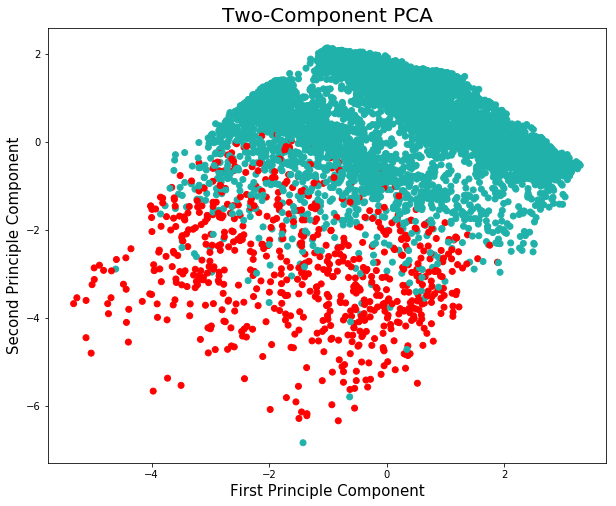

In [13]:
def colors(y):
    if y == 1:
        return "red"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component", fontsize = 15)
plt.title('Two-Component PCA', fontsize = 20)
plt.show()

We can observe that data points with different labels overlap with each other. Therefore, we cannot separate the data by using only the first two PCs.

We will use ```preprocess``` function and ```PCA``` class from Scikit-Learn to standardize the data and perform PCA.

In [14]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}\n")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.30739291 0.23382242 0.13848929 0.11021484 0.08177317 0.05702722
 0.03818812 0.02804913 0.0050429 ]

per_var = [30.74 23.38 13.85 11.02  8.18  5.7   3.82  2.8   0.5 ] 



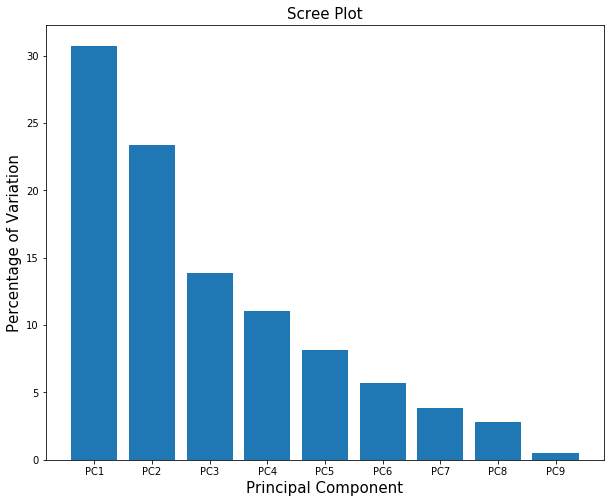

In [17]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,10)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 10), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

We call function ```pca.components_``` to see how each PC is obtained as a linear combination of the original coordinates.

In [18]:
pca.components_[:,0]

array([ 0.09753743,  0.35615623,  0.3680171 , -0.12974278,  0.84036674,
       -0.00539723,  0.04518062, -0.05535575,  0.00429993])

We use ```pca.transform``` to see how our data looks like in the new coordinate system.

In [19]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,1.948883,0.106426,1.019533,-0.046511,-0.387620,-1.206386,1.412277,1.108664,-0.201579
1,1.464070,-0.594587,0.588241,0.064357,-0.935407,-1.700406,0.699534,-0.126223,-0.092111
2,1.593700,-0.360696,0.817780,-0.011122,-0.449597,-1.791066,0.670370,-0.189495,-0.091647
3,1.382173,-0.242816,0.522311,0.046823,-0.593926,-1.782343,0.664615,-0.172003,-0.092949
4,1.922978,-1.150464,0.093821,1.077456,-0.143057,-0.007384,0.149645,0.393404,-0.102170


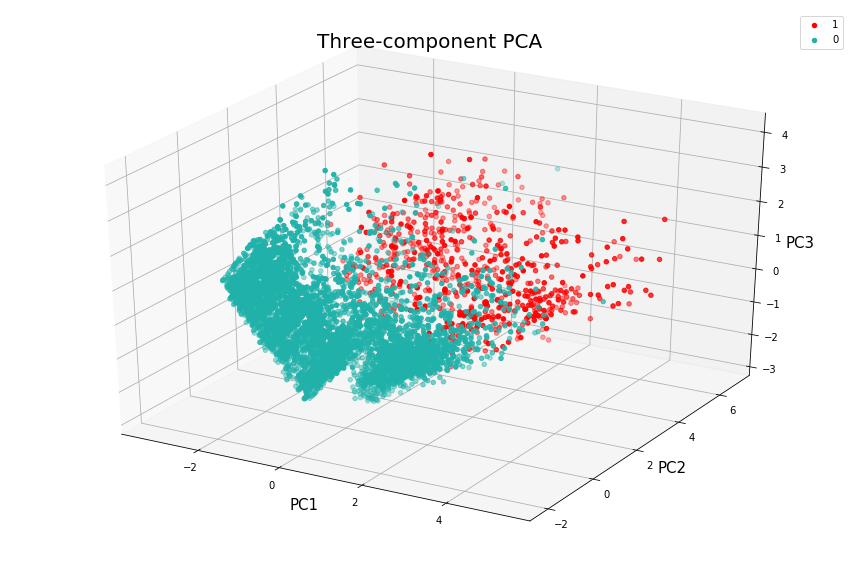

In [21]:
from mpl_toolkits.mplot3d import Axes3D
## We add to the previous table the labels
projected_df = pd.concat([pca_df, y], axis = 1)

targets = [1,0]
colors = ["red", "lightseagreen"]

plt.figure(figsize = (15, 10))
ax = plt.subplot(111, projection = '3d')

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df.Class == target]
    ax.scatter(temp_df["PC1"], temp_df["PC2"], temp_df['PC3'],
                c = color)

ax.set_xlabel('PC1', size = 15)
ax.set_ylabel('PC2', size = 15)
ax.set_zlabel('PC3', size = 15)
plt.title('Three-component PCA', size = 20)
plt.legend(targets)
plt.show()